# Лабораторная работа №1

### Выполнил Рыбаков Владислав, БПМ201, 30 вариант

Задания 2.1.30, 2.7.5, 2.8.5

### Задание 2.1.30

Даны два уравнения $f(x) = 0$ и $g(x) = 0$. Найти с точностью $\epsilon = 10^{-10}$ все корни уравнений, содержащиеся на отрезке $[a, b]$. Для решения задачи использовать метод бисекции.
$$ f(x) = x^4 - \frac{21}{2} x^2 +5$$
$$ g(x) = x^4 - x^2 + \frac{1}{4}$$
на отрезке $[0, 5]$.


##### Аналитическое решение задачи:

Найдем аналитическим способом корни для уравнения $f(x) = 0$ на отрезке $[0, 5]$:


$$ x^4 - \frac{21}{2} x^2 +5 = 0$$

$$ x_1 = \frac{\sqrt{2}}{2}, x_2 = \sqrt{10} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 4, 100) # отрезок взян из соображений, чтобы корни выглядели более наглядно
f = x**4 - 21/2 * x**2 + 5

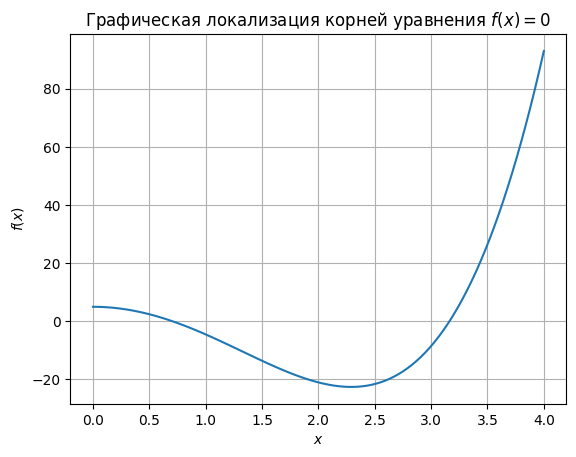

In [3]:
plt.plot(x, f)
plt.title(r'Графическая локализация корней уравнения $f(x)=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid(True)

In [4]:
def f(x):
    return x**4 - 21/2 * x**2 + 5

In [5]:
def bisec(f, a, b, eps):
    an = a
    bn = b
    k = 0
    while (bn - an) > 2*eps:
        xn = (an + bn) / 2
        fa = f(an)
        fb = f(bn)
        fxn = f(xn)
        if fa*fxn <= 0:
            bn = xn
        else:
            an = xn
        k += 1
    
    xn = (an + bn)/2
    res = [xn, k]
    return res

In [6]:
x1 = bisec(f, 0, 1, 10**(-10))
x2 = bisec(f, 3, 4, 10**(-10))
print("x1 =", x1[0], "\tЧисло итераций:", x1[1], "\nx2 =", x2[0], "\tЧисло итераций:", x2[1])

x1 = 0.7071067811339162 	Число итераций: 33 
x2 = 3.162277660157997 	Число итераций: 33


**Значения корней, найденные аналитически и численно, совпадают.**

Найдем аналитическим способом корни для уравнения $g(x) = 0$ на отрезке $[0, 5]$:


$$ x^4 - x^2 + \frac{1}{4} = 0$$

$$ x_1 = \frac{\sqrt{2}}{2} $$
(корень кратности 2)

In [7]:
x = np.linspace(0, 1, 100) # отрезок взян из соображений, чтобы корни выглядели более наглядно
g = x**4 - x**2 + 1/4

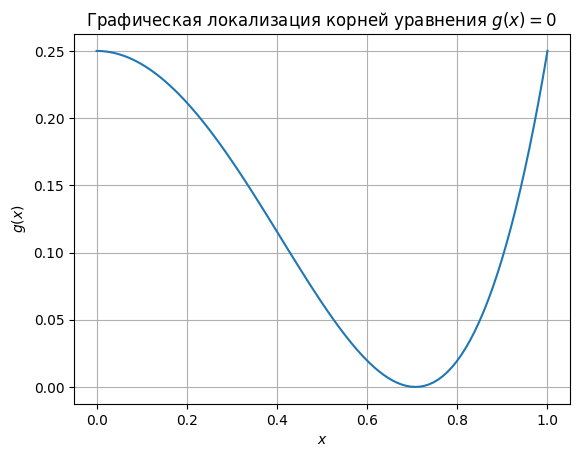

In [8]:
plt.plot(x, g)
plt.title(r'Графическая локализация корней уравнения $g(x)=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.grid(True)

In [9]:
def g(x):
    return x**4 - x**2 + 1/4

In [10]:
x1 = bisec(g, 0, 1, 10**(-10))
print("x1 =", x1[0], "\tЧисло итераций:", x1[1])

x1 = 0.9999999999417923 	Число итераций: 33


**Из-за того, что кратность корня 2, метод бисекции не работает и выдает результат, отличный от найденного аналитическим способом.**

### Задание 2.7.5

Локализовать корни уравнения $f(x) = 0$. Найти их с точностью $\epsilon = 10^{-5}$ и $\epsilon = 10^{-12}$, используя
метод Ньютона, упрощенный метод Ньютона и метод секущих. Сравнить скорость сходимости методов (по
числу итераций) для каждого значения $\epsilon$.

$$ f(x) = \sqrt{x} + x^2 -10$$

In [11]:
# локализуем корни графически
x = np.linspace(0, 4, 100)
f = np.sqrt(x) + x*x - 10

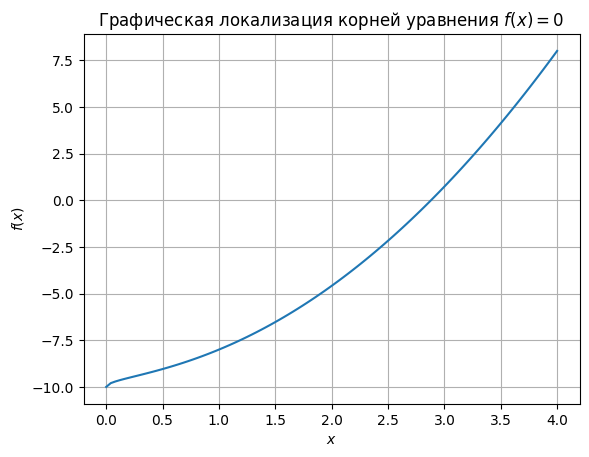

In [12]:
plt.plot(x, f)
plt.title(r'Графическая локализация корней уравнения $f(x)=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid(True)

In [13]:
# функция
def f(x): 
    return np.sqrt(x) + x*x - 10

# производная функции
def df(x): 
    return 1/(2*np.sqrt(x)) + 2*x

# метод ньютона
def newton(f, df, x, eps):
    x_prev = x
    x = x - f(x)/df(x)
    iteration_counter = 1
    while abs(x_prev - x) > eps:
        x_prev = x
        x = x - f(x)/df(x)
        iteration_counter += 1
    return x, iteration_counter

In [14]:
# упрощенный метод ньютона
def easy_newton(f, df, x, eps):
    diff = df(x)
    x_prev = x
    x = x - f(x)/diff
    iteration_counter = 1
    while abs(x_prev - x) > eps:
        x_prev = x
        x = x - f(x)/diff
        iteration_counter += 1
    return x, iteration_counter

In [15]:
# метод секущих
def sec(f, x1, x2, eps):
    x = x1 - ((x2-x1) / (f(x2)-f(x1)))*f(x1)
    iteration_counter = 1
    while abs(x1 - x) > eps:
        x2 = x1
        x1 = x
        x1 - ((x2-x1) / (f(x2)-f(x1)))*f(x1)
        iteration_counter += 1
    return x, iteration_counter

In [16]:
eps5 = 10**(-5)
eps12 = 10**(-12)
x = 3.0

x1_new = newton(f, df, x, eps5)
x2_new = newton(f, df, x, eps12)
x1_easy = easy_newton(f, df, x, eps5)
x2_easy = easy_newton(f, df, x, eps12)
x1_sec = sec(f, x, 4, eps5)
x2_sec = sec(f, x, 4, eps12)

print(f'Метод Ньютона:\n\tдля эпслион 10^-5:  {x1_new}\n\tдля эпсилон 10^-12: {x2_new}\n')
print(f'Упрощенный метод Ньютона:\n\tдля эпслион 10^-5:  {x1_easy}\n\tдля эпсилон 10^-12: {x2_easy}\n')
print(f'Метод секущих:\n\tдля эпслион 10^-5:  {x1_sec}\n\tдля эпсилон 10^-12: {x2_sec}\n')
print('\nP.s. (вычисленное значение, кол-во итераций)')

Метод Ньютона:
	для эпслион 10^-5:  (2.8814107862566884, 3)
	для эпсилон 10^-12: (2.8814107862565943, 4)

Упрощенный метод Ньютона:
	для эпслион 10^-5:  (2.8814108937584257, 4)
	для эпсилон 10^-12: (2.8814107862566014, 9)

Метод секущих:
	для эпслион 10^-5:  (2.899276840249346, 2)
	для эпсилон 10^-12: (2.899276840249346, 2)


P.s. (вычисленное значение, кол-во итераций)


**Как мы видим, упрощенный метод Ньютона сходится на 1 итерацию больше, чем оригинальный метод Ньютона для $\epsilon = 10^{-5}$, а при $\epsilon = 10^{-12}$ в методе Ньютона увеличивается число итераций всего на 1, а в упрощенном методе Ньютона число итераций возрасло на 5. Метод секущих сходится быстрее всех, и при изменении значения $\epsilon$ количество итераций не изменилось.**

### Задание 2.8.5

Найти приближенно все (в том числе комплексные) корни уравнения $f(x) = 0$ с точностью $\epsilon = 10^{-5}$, используя метод Ньютона.

$$ f(x) = x^5 + 2x^4 + 4x^3 -5x + 2.7 $$

Так как многочлен пятой степени, то всего корней у многочлена 5.

In [17]:
# локализуем корни графически
x = np.linspace(-2, 1.5, 100)
f = x**5 + 2*x**4 + 4*x**3 - 5*x + 2.7

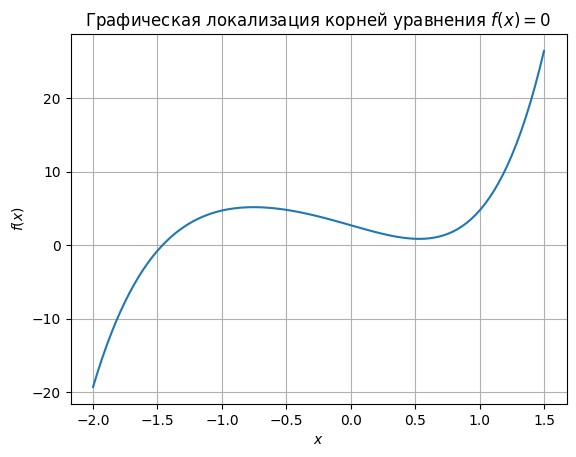

In [18]:
plt.plot(x, f)
plt.title(r'Графическая локализация корней уравнения $f(x)=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid(True)

In [19]:
# функция
def f(x): 
    return x**5 + 2*x**4 + 4*x**3 - 5*x + 2.7

# производная функции
def df(x): 
    return 5*x**4 + 8*x**3 + 12*x**2 -5

In [20]:
x_r = newton(f, df, -1.5, 10**(-5))
print(x_r)

(-1.4602751132148468, 3)


In [21]:
x_c1 = newton(f, df, np.complex64(1 + 1j), 10**(-5))
x_c2 = newton(f, df, np.complex64(1 - 1j), 10**(-5))
x_c3 = newton(f, df, np.complex64(-1 + 2j), 10**(-5))
x_c4 = newton(f, df, np.complex64(-1 - 2j), 10**(-5))
print(x_c1, x_c2, x_c3, x_c4, sep='\n')

((0.5667542044406737+0.26611004118786963j), 7)
((0.5667542044406737-0.26611004118786963j), 7)
((-0.8366166478669105+2.004126965251789j), 4)
((-0.8366166478669105-2.004126965251789j), 4)


**Итого, нашли 5 корней, из которых 1 корень действительный и 4 корня комплексные.**